<a href="https://colab.research.google.com/github/Mahadevan0507/EMC1/blob/main/Data_Developer_Salary_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'data-eng-salary-2024:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5183463%2F8653190%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240711%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240711T151747Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D910eaba0aafc84f328cf78ea32600b5e454dcf9b0bca363ab3411d3e361c76d11a50cfecc9218691e4290ca5974a2893edab1cc61005fc87249fad0461c15635ea4fa9e6cffbd32d7cd5895e56d275b68c9f1924894561bffd604710abd853ccef2e20eb740711361a5bd16e2d21e9dd4885c666bd8bf90a47c1c9f047a8be0059b7fe57dc89e8bac575481e6c1485660a7fa28f6884f5e13c54df292d5f440384b99855496ec8522076ae81dfb18ec286519e7af705a0b5096d8793a2b62b4997de5d7dc85f292c385357fc69b3015a139ded17d345917030866859103c7eed2c57f6944f0c9de16650f608784013596fd88a9d9874913904c983cd7a450c7d'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 110295 bytes downloaded
Downloaded and uncompressed: data-eng-salary-2024
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-eng-salary-2024/Dataset salary 2024.csv


### ***Reading CSV***

In [3]:
df = pd.read_csv('/kaggle/input/data-eng-salary-2024/Dataset salary 2024.csv')

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [5]:
df['salary_currency'].nunique()

23

### *Salary Per Anum($) according to job title*

In [6]:
job_salary_usd = df.groupby('job_title')['salary_in_usd'].mean()
job_salary_usd

job_title
AI Architect                       252551.241379
AI Developer                       135466.789474
AI Engineer                        162730.508333
AI Product Manager                 141766.666667
AI Programmer                       62042.000000
                                       ...      
Sales Data Analyst                  60000.000000
Software Data Engineer             111627.666667
Staff Data Analyst                  79917.000000
Staff Data Scientist               134500.000000
Staff Machine Learning Engineer    185000.000000
Name: salary_in_usd, Length: 155, dtype: float64

### **So, we can say that the highest paying job is Analytics engineering manager**

In [7]:
highest_salary_job = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending= True)

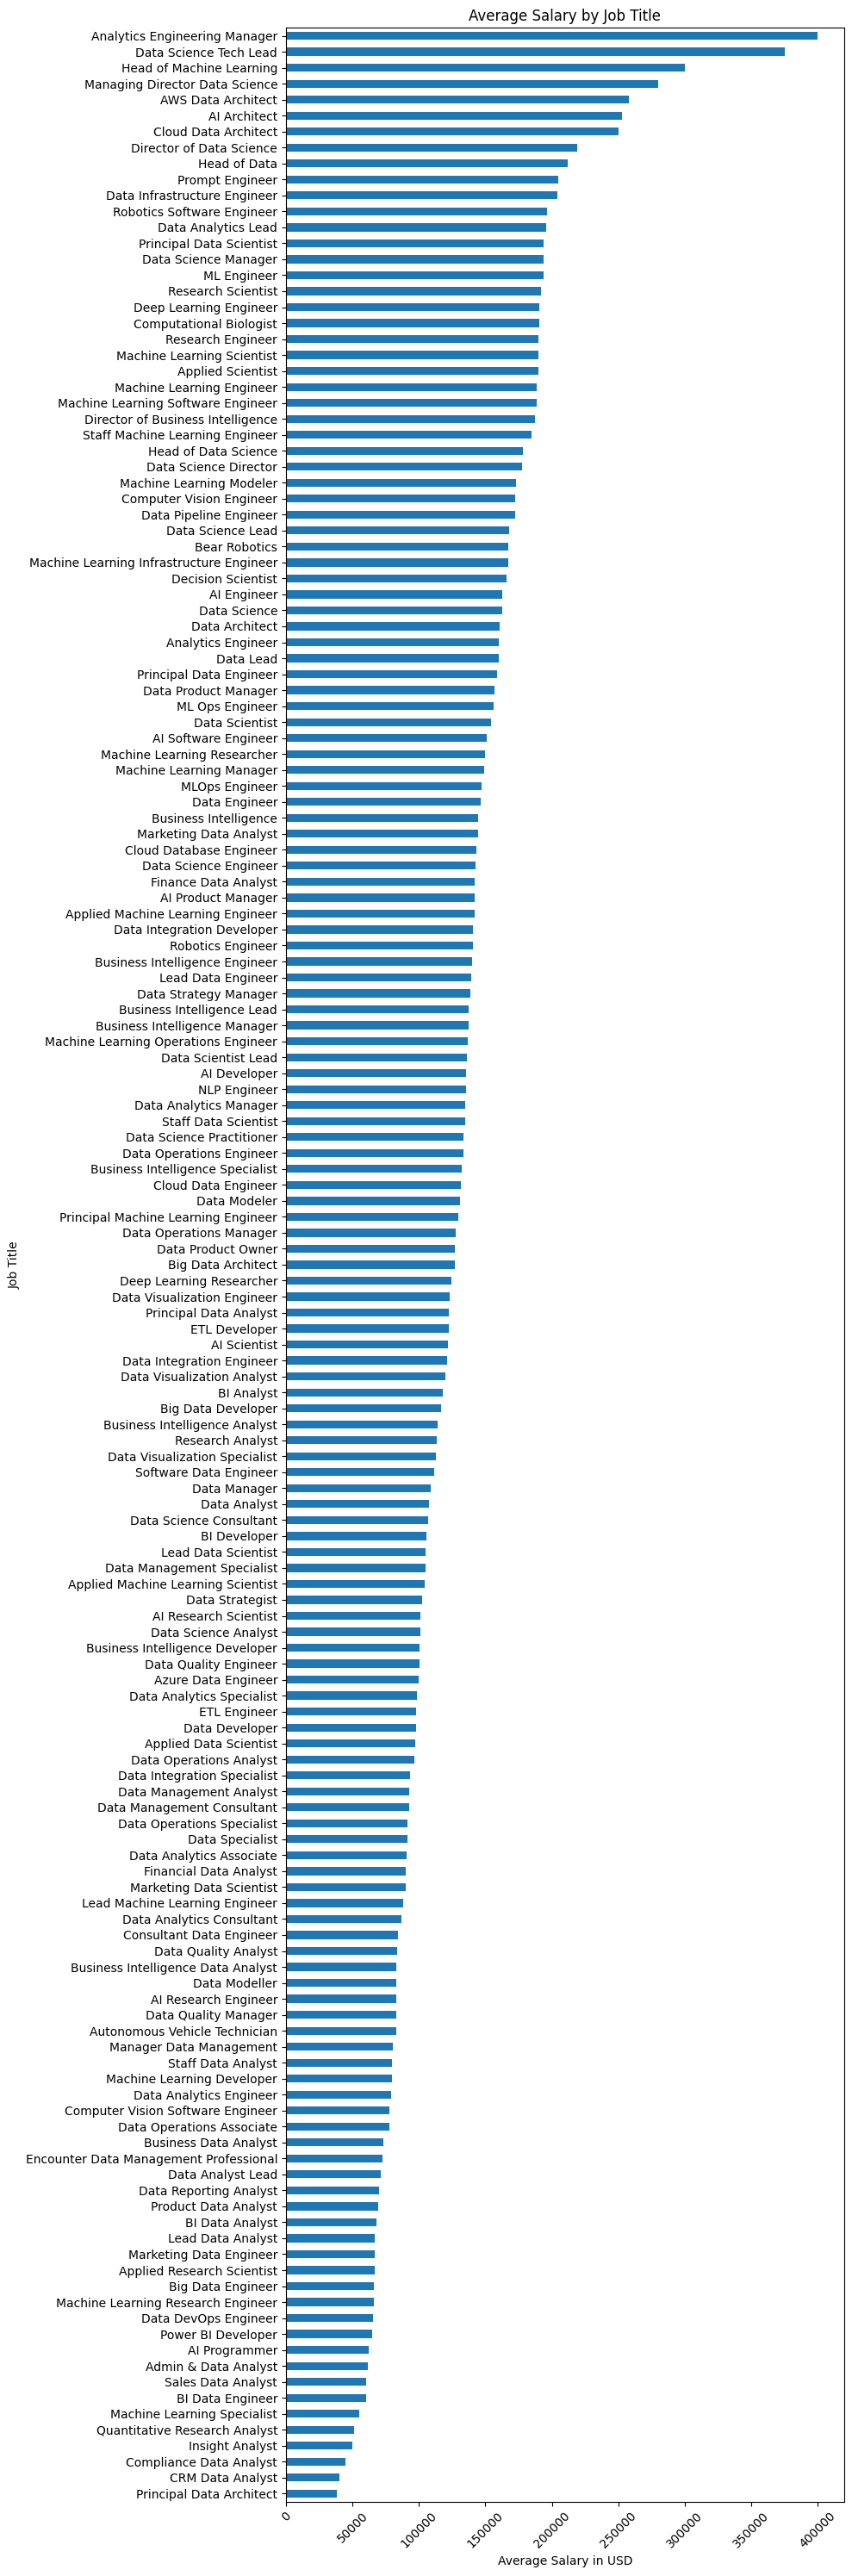

In [8]:
plt.figure(figsize=(10, 30))
highest_salary_job.plot(kind='barh')
plt.title('Average Salary by Job Title')
plt.xlabel('Average Salary in USD')
plt.ylabel('Job Title')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### *Now, I'm sure this level of pay wouldn't be given to entry level people. So proved Executive are paid the most*

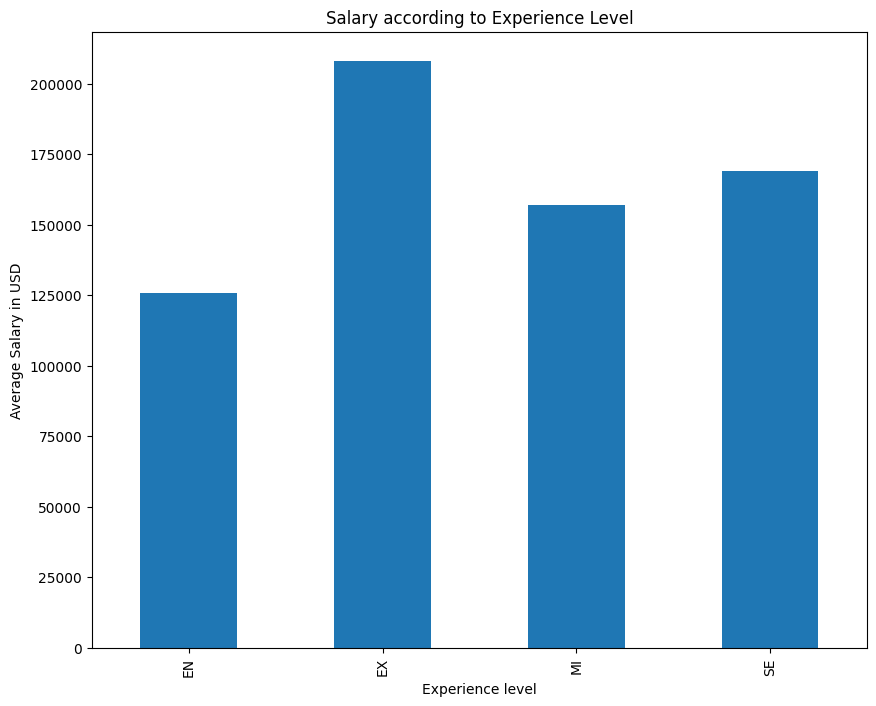

In [9]:
experience_salary_usd = df.groupby('experience_level')['salary'].mean()
plt.figure(figsize=(10,8))
experience_salary_usd.plot(kind = 'bar')
plt.title('Salary according to Experience Level')
plt.xlabel('Experience level')
plt.ylabel('Average Salary in USD')
plt.show()

### *Here it shows that in each experience level who are the most paid people. Here's an anomaly how someone mid level is paid more than an executive. Because different jobs have different level of salary packages*

                                            Job Title  Average Salary (USD)
experience_level                                                           
EN                           (EN, Research Scientist)         165070.486486
EX                     (EX, Principal Data Scientist)         416000.000000
MI                                 (MI, AI Architect)         800000.000000
SE                (SE, Analytics Engineering Manager)         399880.000000


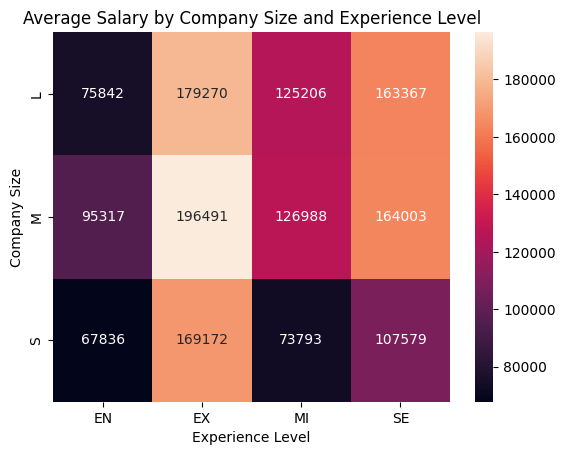

In [10]:
average_salary_by_experience_and_title = df.groupby(['experience_level', 'job_title'])['salary_in_usd'].mean()

highest_paying_jobs_by_experience = average_salary_by_experience_and_title.groupby(level=0).idxmax()
highest_salaries_by_experience = average_salary_by_experience_and_title.groupby(level=0).max()

highest_paying_jobs_salaries = pd.DataFrame({
    'Job Title': highest_paying_jobs_by_experience.values,
    'Average Salary (USD)': highest_salaries_by_experience.values
}, index=highest_paying_jobs_by_experience.index)
print(highest_paying_jobs_salaries)


# Heatmap to show the average salary by company size and another variable (e.g., experience level)
salary_heatmap = df.pivot_table(values='salary_in_usd', index='company_size', columns='experience_level', aggfunc='mean')
sns.heatmap(salary_heatmap, annot=True, fmt=".0f")
plt.title('Average Salary by Company Size and Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Company Size')
plt.show()



#### *Do small companies give same level of salaries? In the particular scenario Medium level companies are paying more*

company_size
L    140889.563462
M    151059.071214
S     86627.111702
Name: salary_in_usd, dtype: float64


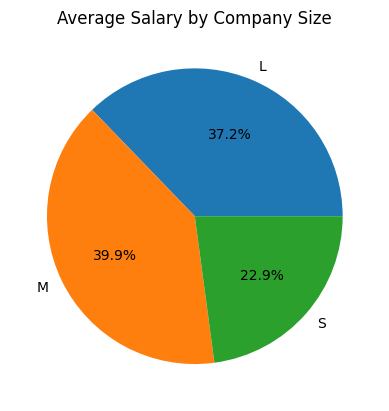

In [11]:
company_salary_size = df.groupby('company_size')['salary_in_usd'].mean()
print(company_salary_size)
company_salary_size.plot(kind='pie', autopct='%1.1f%%')
plt.title('Average Salary by Company Size')
plt.ylabel('')
plt.show()




### *Now I want to see, how the remote ratio is moving by passing years. Data is showing that by each passing year remote ratio is going up*

In [12]:
df['remote_ratio']

0          0
1          0
2          0
3          0
4          0
        ... 
16529    100
16530    100
16531    100
16532    100
16533     50
Name: remote_ratio, Length: 16534, dtype: int64

<Figure size 1000x1000 with 0 Axes>

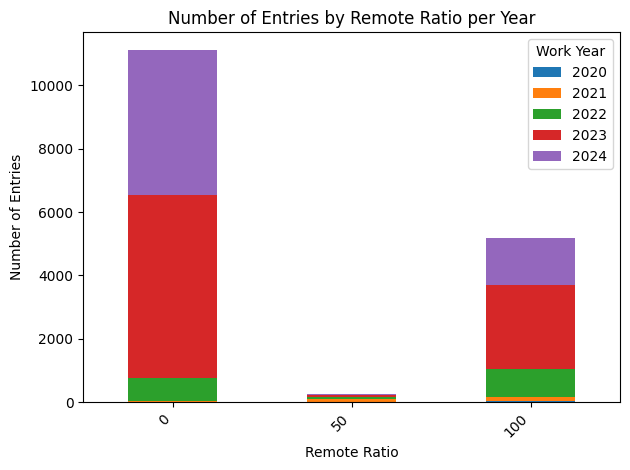

In [13]:
remote_year_ratio = df.groupby(['remote_ratio', 'work_year']).size().unstack().fillna(0)

plt.figure(figsize=(10,10))
remote_year_ratio.plot(kind='bar', stacked=True)
plt.title('Number of Entries by Remote Ratio per Year')
plt.xlabel('Remote Ratio')
plt.ylabel('Number of Entries')
plt.legend(title='Work Year')
plt.xticks(rotation = 45 , ha = 'right')
plt.tight_layout()
plt.show()


#### *Which country has the most diverse hiring? A biggest hiring diverse country is USA*

In [14]:
company_employee_hiring = df.groupby(['company_location', 'employee_residence']).size().reset_index(name='employee_count')

fig = px.sunburst(company_employee_hiring, path=['company_location', 'employee_residence'], values='employee_count',
                  color='employee_count', hover_data=['company_location'],
                  color_continuous_scale='RdBu', title='Employee Distribution by Company Location')
fig.show()


In [15]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [16]:
df['work_year'] = df['work_year'].astype(int)

In [17]:
average_salary_by_year = df.groupby('salary')['work_year'].mean().sort_values(ascending = True)
average_salary_by_year

salary
14000     2020.0
138350    2020.0
61500     2020.0
51999     2020.0
45760     2020.0
           ...  
136675    2024.0
136420    2024.0
136400    2024.0
149750    2024.0
145100    2024.0
Name: work_year, Length: 2560, dtype: float64

> *This shows that in the days of COVID-19 the salaries was skyrocketed*

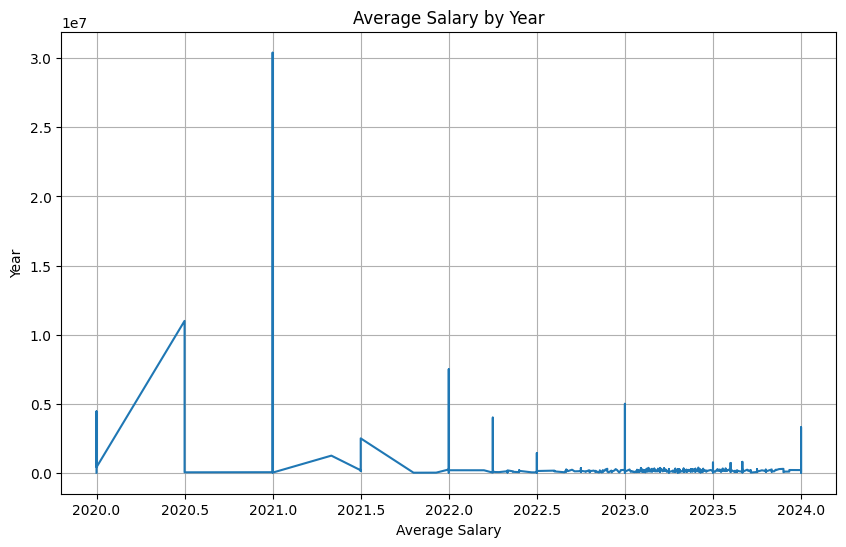

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(average_salary_by_year.values, average_salary_by_year.index)
plt.ylabel('Year')
plt.xlabel('Average Salary')
plt.title('Average Salary by Year')
plt.grid(True)
plt.show()


***Salary Distribution by Experience Level***

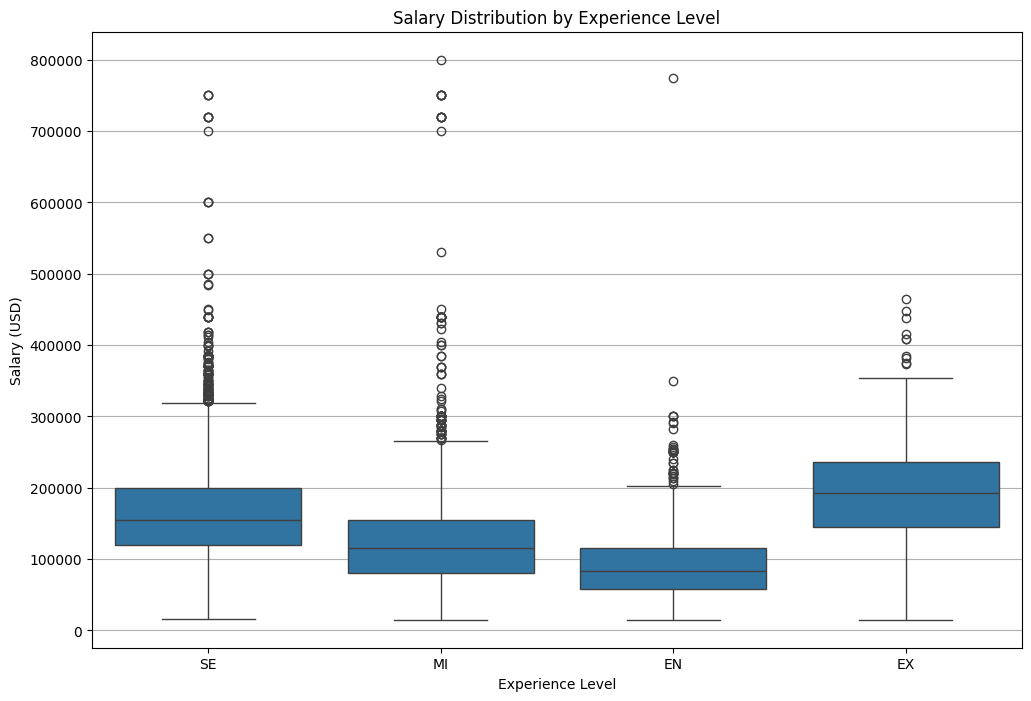

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.title('Salary Distribution by Experience Level')
plt.grid(axis='y')
plt.show()


***Employment Type Distribution***

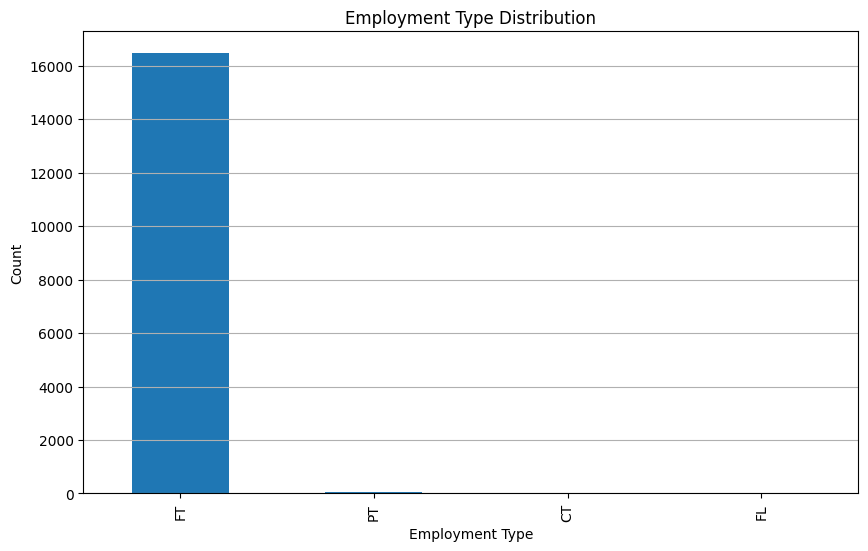

In [20]:
employment_type_counts = df['employment_type'].value_counts()

plt.figure(figsize=(10, 6))
employment_type_counts.plot(kind='bar')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.title('Employment Type Distribution')
plt.grid(axis='y')
plt.show()


***Remote Work by Job Title***